# Programming Assignment 1: LASSO

### Instructor: Yuanyuan Shi

### Teaching Assistants

- Yuexin Bian, [yubian@ucsd.edu]
- Tz-Ying Wu, [tzw001@ucsd.edu]

## Instructions
1. This assignment must be completed individually.  
2. This notebook contains skeleton code, which should not be modified
3. You must run all cells in this notebook and submit this notebook as an .ipynb file.
4. You must submit the .ipynb on Gradescope.

## Setup

In [2]:
import numpy as np
from numpy import linalg
import scipy
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Comment it if you are not using mac
# %config InlineBackend.figure_format = 'retina'


## Implement coordinate descent 

In [3]:
def soft_threshold(a, c, reg):
  if (c < -reg):
    return ((c + reg) / a)
  elif (c > reg):
    return ((c - reg) / a)
  else:
    return 0

In [5]:
#TODO: You should initialize w_0 and w
# Initialize w_0 to be 0, and initialize vector w that each element follows gaussian distribution (0, 1)
# Implement algorithm following algorithm 1
def lasso(X, y, reg):
    """
    Args:
        X: (N, d) 
        y: (N, 1)
        reg: regularization coefficient lambda
    Returns:
        w: (d, 1) weight vector
        w0: unregularized term
    """
    X = np.copy(X)
    np.random.seed(0)
    N, d = X.shape
    mu = 0
    sigma = 1
    w = np.random.normal(mu, sigma, (d,1))
    w0 = 0
    T = 100 #num iterations
    # X_norm = X / (np.linalg.norm(X, axis = 0))
    for t in range(T):
      y_t = X@w + w0
      w0_t1 = y-X@w
      y_t = y_t - w0 + w0_t1
      w0 = w0_t1
      for k in range(d):
        X_k = X[:, k].reshape(-1, 1)
        a_k = 2*np.sum(X_k**2)
        c_k = 2*X_k.T @ (y - (w0_t1 + X @ w - w[k]*X_k))

        w[k] = soft_threshold(a_k, c_k, reg)

      # loss = np.sum((X@w + w0_t1 - y)**2) + reg*np.sum(np.abs(w))
      # print(loss)
        
    return w, w0

In [6]:
# K, d, N = 6, 80, 50
# w, w0 = generate_true_w(d=d, K=K)
# X, y = generate_data(w, w0, N=N, d=d, sigma=1)
# X

In [8]:
# X = np.array([[1, 2, 3],
#               [4, 5, 6],
#               [7, 8, 9]])
# np.sum(X[:, 0:0])
# mu = 1;
# sigma = 1;
# d = 100;
# w = np.random.normal(mu, sigma, X.shape[1])
# print(w)
# print(X.shape[1])
# np.sum(w[2:])

# for i in range(3):
#   print(i)

In [9]:
# K = 6
# d = 20
# w = np.zeros((d, 1))
# w[0:K] = np.random.normal(mu, 10, (K,1))
# w


## Dataset: synthetic data (15 points)
### 1. Generate data X, y
### 2. solve multiple lasso problems on a regularization path
### 3. Plot the precision and recall via regularizations

In [23]:
#TODO: generate true weight vector and weight following assignment
def generate_true_w(d, K):
    """
    Args:
        d: int dimension of the input data X (N, d)
        K: int, the number of useful features
    Returns:
        w: (d,1) weight vector
        w0: unregularized term
    """
    np.random.seed(0)
    mu = 0;
    w = np.zeros((d, 1))
    w[0:K] = np.random.normal(mu, 10, (K,1))
    w0 = 0
    return w, w0

#TODO: generate true weight vector and weight following assignment
def generate_data(w, w0, N, d, sigma):
    """
    Args:
        w: (d,1) weight vector
        w0: unregularized term
        N: int, the number of data samples
        d: int, dimension of the input data X (N, d)
        sigma: standard deviation of gaussian noise to generate y
    Returns:
        X: array (N, d)
        y: array (N, 1)
    """
    np.random.seed(0)
    e = np.random.normal(0, sigma**2, (N, 1))
    X = np.random.normal(0, 1, (N, d))
    y = X@w + w0 + e
    return X, y.reshape(-1, 1)


#TODO: compute max lambda follow equation (2) in assignment document
def compute_lambdamax(X, y):
    """
    Args:
        X: (N,d) input data
        y: (N,1) input label
    Returns:
        maxreg: int, estimated max value of regularization term
    """
    maxreg = 2*np.max(X.T@(y-np.mean(y)))
    return maxreg

# Using the plot function to generate plots
def plot(regs, precision, recall):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    ax[0].plot(regs, precision, label='precision')
    ax[1].plot(regs, recall, label='recall')
    ax[0].set_xlabel('L1 regularization strength')
    ax[1].set_xlabel('L1 regularization strength')
    ax[0].set_title('Precision')
    ax[1].set_title('Recall')
    ax[0].set_xlim(0, 10)
    ax[1].set_xlim(0, 10)
    plt.show()


In [14]:
#TODO
# Conduct experiments in 2.2 Dataset: synthetic data
K, d, N = 6, 80, 50
w, w0 = generate_true_w(d=d, K=K)
X, y = generate_data(w, w0, N=N, d=d, sigma=1)
reg = compute_lambdamax(X, y)
regmax = reg
print(reg)

# Feel free to change this decreasing ratio
ratio = 1.5

# num of trials
q = 50
regs = np.zeros(q)
precision = np.zeros(q)
recall = np.zeros(q)
lasso_loss = np.zeros(q)
for i in range(q):
    pred_w, pred_w0 = lasso(X, y, reg)
    lasso_loss[i] = np.sum((X@pred_w + pred_w0 - y)**2) + reg*np.sum(np.abs(pred_w))
    if(np.count_nonzero(pred_w)==0):
        precision[i] = -1
    else:
        precision[i] = np.count_nonzero(pred_w[:K])/np.count_nonzero(pred_w)
    recall[i] = np.count_nonzero(pred_w[:K])/K
    regs[i] = reg
    reg = reg/ratio


2526.0874935682505


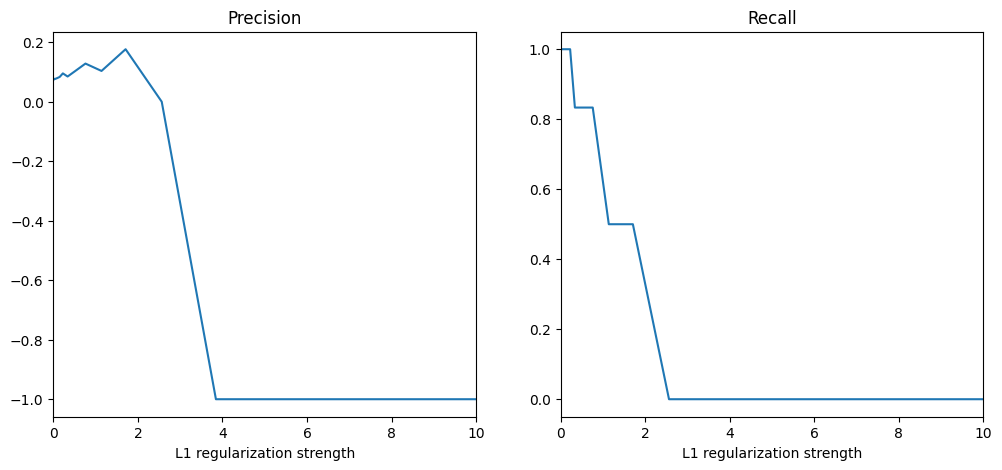

(0.0, 10.0)

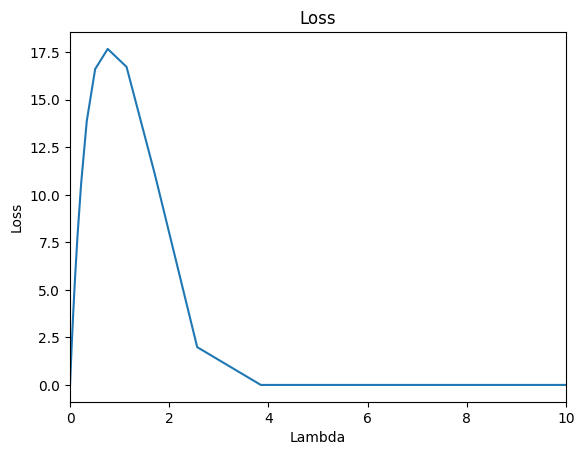

In [24]:
plot(regs, precision, recall)
plt.plot(regs, lasso_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Lambda')
plt.xlim(0, 10)

In [16]:
print(precision)
print(recall)
print(regs)
i = np.argmax(precision*recall)
print(lasso_loss)

w_star, w0_star = lasso(X, y, regs[i])
loss = np.sum((X@w_star + w0_star - y)**2) + reg*np.sum(np.abs(w_star))
print(loss)
print(regs[i])
# print(w0_star)
# print(w_star)

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.          0.
  0.17647059  0.10344828  0.12820513  0.10204082  0.08474576  0.0952381
  0.08333333  0.08        0.07792208  0.07692308  0.07692308  0.075
  0.075       0.075       0.075       0.075       0.075       0.075
  0.075       0.075       0.075       0.075       0.075       0.075
  0.075       0.075       0.075       0.075       0.075       0.075
  0.075       0.075     ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.5        0.5        0.83333333 0.83333333 0.83333333 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        

## Dataset: Water quality data (20 points)
### 1. Load data X, y
## For predicting the water quality data for the first location and second location
### 2. find good regularization coefficient, record RMSE for training data, validation data and test data
### 3. list largest weight magnitude and the names of features

In [ ]:
def prepare_set(X_train, X_test, y_train, y_test, loc=0):
    X_train_1 = np.zeros((423, 11))
    X_test_1 = np.zeros((282, 11))
    for i in range(423):
        X_train_1[i,:] = X_train[0,i][loc]
        if i < 282: X_test_1[i,:] = X_train[0,i][loc]
    y_train_1 = y_train[0].reshape(-1, 1)
    y_test_1 = y_test[0].reshape(-1, 1)
    X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=0)
    return X_train_1, X_val_1, X_test_1, y_train_1, y_val_1, y_test_1

def compute_rmse(y, ypred):
    return np.sqrt(((y - ypred) ** 2).mean())

def plot2(regs, train_rmse, val_rmse):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    ax[0].plot(regs, train_rmse, label='Training RMSE')
    ax[1].plot(regs, val_rmse, label='Validation RMSE')
    ax[0].set_xlabel('L1 regularization strength')
    ax[1].set_xlabel('L1 regularization strength')
    ax[0].set_title('Training RMSE')
    ax[1].set_title('Validation RMSE')
    plt.show()

# Read data
data_file = "water_dataset.mat"   
data = scipy.io.loadmat(data_file)
X_train, X_test = data['X_tr'], data['X_te']
y_train, y_test = data['Y_tr'], data['Y_te']

# Change location using loc parameters
X_train_1, X_val_1, X_test_1, y_train_1, y_val_1, y_test_1 = prepare_set(X_train, X_test, y_train, y_test, loc=0) 


print('X_train.shape', X_train_1.shape, 'X_validate.shape', X_val_1.shape, 'X_test.shape', X_test_1.shape)
print('y_train.shape', y_train_1.shape, 'u_validate.shape', X_val_1.shape, 'y_test.shape', y_test_1.shape)

FileNotFoundError: ignored

In [ ]:
#TODO
# Conduct experiments: 2.3 Water quality prediction